<a href="https://colab.research.google.com/github/astrasourav/Deep-Learning-/blob/master/Mnist_99%25_acc_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and downloading datasets

In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Preprocessing the data

In [0]:
# plt.imshow(train_image[0], cmap='binary')
# plt.show()

# train_label[0]
train_image.shape

(60000, 28, 28, 1)

In [0]:
train_image = train_image.reshape(train_image.shape[0], 28, 28, 1)
test_image = test_image.reshape(test_image.shape[0], 28, 28, 1)

train_image = train_image/255.0
test_image = test_image/255.0

# Building a model

In [13]:
model = tf.keras.models.Sequential([
                                    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    keras.layers.MaxPooling2D((2,2), strides=2),
                                    keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    keras.layers.MaxPooling2D((2,2), strides=2),
                                    keras.layers.Dropout(0.2),
                                    keras.layers.Flatten(),
                                    keras.layers.Dense(256, activation='relu'),
                                    keras.layers.Dropout(0.2),
                                    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [0]:
# Creating EarlyStopping

es = keras.callbacks.EarlyStopping(patience=10)

In [14]:
# Compiling & training the model

model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_image, train_label, validation_split=0.1, epochs=100, callbacks=es, batch_size=40)

Epoch 1/100
1350/1350 [==============================] - 4s 3ms/step - loss: 0.1595 - accuracy: 0.9502 - val_loss: 0.0447 - val_accuracy: 0.9880
Epoch 2/100
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0370 - val_accuracy: 0.9892
Epoch 3/100
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0439 - val_accuracy: 0.9865
Epoch 4/100
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0324 - val_accuracy: 0.9917
Epoch 5/100
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0324 - val_accuracy: 0.9922
Epoch 6/100
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0371 - val_accuracy: 0.9912
Epoch 7/100
1350/1350 [==============================] - 4s 3ms/step - loss: 0.0162 - accuracy: 0.9942 - val_loss: 0.0356 - val_ac

In [15]:
# Evaluating the model

model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.0373 - accuracy: 0.9923


[0.03727534040808678, 0.9922999739646912]

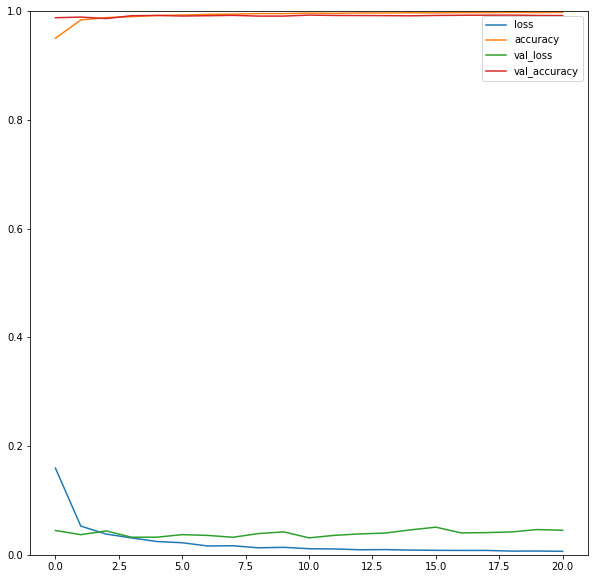

In [16]:
# Plotting the graph

pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

2

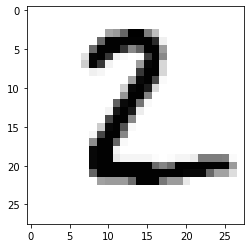

In [33]:
# Predicting the data

index=1
plt.imshow(test_image[index].reshape(28,28), cmap='Greys')
test_label[index]